In [1]:
import os, glob
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from zipfile import ZipFile
import argparse
import pdb
import HEI
import sys

In [2]:
important=['Participant ID','Date of Intake', 'Energy (kcal)','Total Fat (g)','Total Carbohydrate (g)','Total Protein (g)','Animal Protein (g)','Vegetable Protein (g)',
           'Added Sugars (by Total Sugars) (g)','% Calories from SFA', 'Cholesterol (mg)','Total Saturated Fatty Acids (SFA) (g)',
           'Total Dietary Fiber (g)', '% Calories from Fat','% Calories from Carbohydrate','% Calories from Protein','% Calories from Alcohol','% Calories from SFA','% Calories from MUFA','% Calories from PUFA',
           'Added Sugars (by Available Carbohydrate) (g)','Added Sugars (by Total Sugars) (g)',
           'Total Polyunsaturated Fatty Acids (PUFA) (g)','Total Monounsaturated Fatty Acids (MUFA) (g)','Sodium (mg)',
           'Refined Grains (ounce equivalents)','Total Grains (ounce equivalents)','Whole Grains (ounce equivalents)','Refined Grains (ounce equivalents)',
           'VEG0100','VEG0200','VEG0300','VEG0400','VEG0800','VEG0450','VEG0700',
           'VEG0600','VEG0900','VEG0500','VEG0100','VEG0700','FRU0100','FRU0200','FRU0300','FRU0400',
           'FRU0500','FRU0600','FRU0700','FRU0300','FRU0400','FRU0500','FRU0600','FRU0700',
           'DMF0100','DMR0100','DML0100','DMN0100','DMF0200',
           'DMR0200','DML0200','DML0300','DML0400','DCF0100','DCR0100','DCL0100','DCN0100','DYF0100',
           'DYR0100','DYL0100','DYF0200','DYR0200','DYL0200','DYN0100','DOT0300','DOT0400','DOT0500',
           'DOT0600','DOT0100','MRF0100','MRL0100','MRF0200','MRL0200','MRF0300','MRL0300','MRF0400',
           'MRL0400','MCF0200','MCL0200','MRF0500','MPF0100','MPL0100','MPF0200','MFF0100','MFL0100',
           'MFF0200','MSL0100','MSF0100','MCF0100','MCL0100','MOF0100','MOF0200','MOF0300','MOF0400',
           'MOF0500','MOF0600','MOF0700','VEG0700','MFF0100','MFL0100','MFF0200','MSL0100','MSF0100',
           'MOF0500','MOF0600','MOF0700','VEG0700',
           'FRU0100','FRU0200','DMF0200','DMR0200','DML0200','DML0300',
           'SWT0600','BVS0400','BVS0300','BVS0500','BVS0100','BVS0200','BVS0600','BVS0700', 'SWT0600','SWT0100',
           'SWT0200','SWT0300','SWT0700' , 'SWT0800','SWT0400','SWT0500','DOT0300' , 'DOT0400',
           'DOT0100','DOT0200','GRR0800' , 'GRS0800',  'GRW0800','GRW0900' ,'GRS0900' , 'GRR0900' ,
           'GRW1100' , 'GRW1200', 'GRW0400' ,'GRS0400','GRR0400','VEG0800','FMC0100', 'FMC0200','DMF0100',
           'DMR0100','DML0100','DMN0100' ,'DMF0200','DMR0200','DML0200','DOT0500', 'DOT0600','DOT0700',
           'DOT0800','GRW0600','GRS0600','GRR0600','GRW0700','GRS0700','GRR0700','GRW1300','GRS1300']

para_dict = {
        'hei_totveg': {'parameters':[1.1], 'name': 'HEIX1_TOTALVEG'},
        'hei_greensbeans': {'parameters':[0.2], 'name': 'HEIX2_GREEN_AND_BEAN'},
        'hei_totfruit': {'parameters':[0.8], 'name': 'HEIX3_TOTALFRUIT'},
        'hei_wholefruit': {'parameters':[0.4], 'name': 'HEIX4_WHOLEFRUIT'},
        'hei_wholegrains': {'parameters':[1.5], 'name': 'HEIX5_WHOLEGRAIN'},
        'hei_dairy': {'parameters':[1.3], 'name': 'HEIX6_TOTALDAIRY'},
        'hei_totproteins': {'parameters':[2.5], 'name': 'HEIX7_TOTPROT'},
        'hei_seafoodplantprot': {'parameters':[0.8], 'name': 'HEIX8_SEAPLANT_PROT'},
        'hei_refinedgrains': {'parameters':[1.8,4.3], 'name': 'HEIX11_REFINEDGRAIN'},
        'hei_addedsugars': {'parameters':[6.5,26], 'name': 'HEIX12_ADDEDSUGARS'},
        'hei_SFA': {'parameters':[8,16], 'name': 'HEIX13_SATFATS'},
        'Fats': {'parameters':[1.2,2.5], 'name': 'HEIX9_FATTYACID'},
        'hei_sodium':{'parameters':[1.1,2.0],'name':'HEIX10_SODIUM'}
        }

ped811_dict = {
    'hei_vegetables': {'parameters':[0.1,1.9], 'name': 'HEIX1_VEGETABLES'},
    'hei_totfruit': {'parameters':[0.1,1.9], 'name': 'HEIX2_TOTALFRUIT'},
    'hei_wholegrains': {'parameters':[1.0,3.5,0.0 , 8.0], 'name': 'HEIX3_WHOLEGRAIN'},
    'hei_milk': {'parameters':[20,28,8,35], 'name': 'HEIX4_TOTALDAIRY'},
    'hei_proteins': {'parameters':[2.5,6.0,0,10.0], 'name': 'HEIX5_PROTEIN'},
    'hei_refinedgrains': {'parameters':[1.6,3.5], 'name': 'HEIX6_REFINEDGRAIN'},
    'hei_fruitjuice': {'parameters':[0.1,6.0], 'name': 'HEIX7_FRUITJUICE'},
    'hei_SSB': {'parameters':[0.1,4.0], 'name': 'HEIX8_SSB'},
    'hei_sweets': {'parameters':[0.1,1.0], 'name': 'HEIX9_SWEETS'},
    'hei_salty': {'parameters':[0.1,1.0], 'name': 'HEIX10_SALTY'}
        }

ped1224_dict ={
    'hei_vegetables': {'parameters':[0.1,7.9], 'name': 'HEIX1_VEGETABLES'},
    'hei_totfruit': {'parameters':[0.1,7.9], 'name': 'HEIX2_TOTALFRUIT'},
    'hei_wholegrains': {'parameters':[1.5, 5.5, 0, 8.0], 'name': 'HEIX3_WHOLEGRAIN'},
    'hei_milk': {'parameters':[14.0,18.0,8.0,24.0], 'name': 'HEIX4_TOTALDAIRY'},
    'hei_proteins': {'parameters':[2.0,3.0,0,6.0], 'name': 'HEIX5_PROTEIN'},
    'hei_refinedgrains': {'parameters':[1.9, 4.2], 'name': 'HEIX6_REFINEDGRAIN'},
    'hei_fruitjuice': {'parameters':[4.1,6.0], 'name': 'HEIX7_FRUITJUICE'},
    'hei_SSB': {'parameters':[0.1,4.0], 'name': 'HEIX8_SSB'},
    'hei_sweets': {'parameters':[0.1,1.0], 'name': 'HEIX9_SWEETS'},
    'hei_salty': {'parameters':[0.1,1.0], 'name': 'HEIX10_SALTY'}
        }

ped08_dict = {
    'hei_vegetables': {'parameters':[0,0], 'name': 'HEIX1_VEGETABLES'},
    'hei_totfruit': {'parameters':[0,0], 'name': 'HEIX2_TOTALFRUIT'},
    'hei_wholegrains': {'parameters':[0,0,0,0], 'name': 'HEIX3_WHOLEGRAIN'},
    'hei_dairy': {'parameters':[0,0,0,0], 'name': 'HEIX4_TOTALDAIRY'},
    'hei_proteins': {'parameters':[0,0,0,0], 'name': 'HEIX5_PROTEIN'},
    'hei_refinedgrains': {'parameters':[0,0], 'name': 'HEIX6_REFINEDGRAIN'},
    'hei_fruitjuice': {'parameters':[0,0], 'name': 'HEIX7_FRUITJUICE'},
    'hei_SSB': {'parameters':[0,0], 'name': 'HEIX8_SSB'},
    'hei_sweets': {'parameters':[0,0], 'name': 'HEIX9_SWEETS'},
    'hei_salty': {'parameters':[0,0], 'name': 'HEIX10_SALTY'},
    'hei_cereal': {'parameters':[0,0], 'name': 'HEIX11_CEREAL'}
    }

ped_dict={
    'young': ped811_dict,
    'child':ped1224_dict,
    'infant':ped08_dict
}


hei_dict={
      'hei_totveg':
      ['VEG0100','VEG0200','VEG0300','VEG0400','VEG0800','VEG0450','VEG0700','VEG0600','VEG0900','VEG0500'],
      'hei_greensbeans':
      ['VEG0100','VEG0700'],
      'hei_totfruit':
      ['FRU0100','FRU0200','FRU0300','FRU0400','FRU0500','FRU0600','FRU0700'],
      'hei_wholefruit':
      ['FRU0300','FRU0400','FRU0500','FRU0600','FRU0700'],
      'hei_wholegrains':
      ['Whole Grains (ounce equivalents)'],
      'hei_dairy':
      ['DMF0100','DMR0100','DML0100','DMN0100','DMF0200','DMR0200','DML0200',
                   'DML0300','DML0400','DCF0100','DCR0100','DCL0100','DCN0100','DYF0100',
                   'DYR0100','DYL0100','DYF0200','DYR0200','DYL0200','DYN0100',
                   'DOT0300','DOT0400','DOT0500','DOT0600','DOT0100'],
      'hei_totproteins':
      ['MRF0100','MRL0100','MRF0200','MRL0200','MRF0300','MRL0300','MRF0400',
                         'MRL0400','MCF0200','MCL0200','MRF0500','MPF0100','MPL0100','MPF0200',
                         'MFF0100','MFL0100','MFF0200','MSL0100',
                         'MSF0100','MCF0100','MCL0100','MOF0100','MOF0200','MOF0300','MOF0400','MOF0500',
                         'MOF0600','MOF0700','VEG0700'],
      'hei_seafoodplantprot':
      ['MFF0100','MFL0100','MFF0200','MSL0100','MSF0100','MOF0500','MOF0600','MOF0700','VEG0700'],
      'hei_sodium':
      ['Sodium (mg)'],
      'hei_refinedgrains':
      ['Refined Grains (ounce equivalents)'],
      'hei_addedsugars':
      ['Added Sugars (by Total Sugars) (g)'],
      'ripctsfa': ['% Calories from SFA','Energy (kcal)'],
     'energy':
     ['Energy (kcal)'],
     'fats':
     ['Total Polyunsaturated Fatty Acids (PUFA) (g)','Total Monounsaturated Fatty Acids (MUFA) (g)',
     'Total Saturated Fatty Acids (SFA) (g)']
     }

hei_ped_dict={'hei_totveg':
        ['VEG0100','VEG0200','VEG0300','VEG0400','VEG0800','VEG0450','VEG0700','VEG0600','VEG0900','VEG0500'],
        'hei_greensbeans':
        ['VEG0100','VEG0700'],
        'hei_totfruit':
        ['FRU0100','FRU0200','FRU0300','FRU0400','FRU0500','FRU0600','FRU0700'],
        'hei_wholefruit':
        ['FRU0300','FRU0400','FRU0500','FRU0600','FRU0700'],
        'hei_wholegrains':
        ['Whole Grains (ounce equivalents)'],
        'hei_dairy':
        ['DMF0100','DMR0100','DML0100','DMN0100','DMF0200','DMR0200','DML0200',
                     'DML0300','DML0400','DCF0100','DCR0100','DCL0100','DCN0100','DYF0100',
                     'DYR0100','DYL0100','DYF0200','DYR0200','DYL0200','DYN0100',
                     'DOT0300','DOT0400','DOT0500','DOT0600','DOT0100'],
        'hei_totproteins':
        ['MRF0100','MRL0100','MRF0200','MRL0200','MRF0300','MRL0300','MRF0400',
                           'MRL0400','MCF0200','MCL0200','MRF0500','MPF0100','MPL0100','MPF0200',
                           'MFF0100','MFL0100','MFF0200','MSL0100',
                           'MSF0100','MCF0100','MCL0100','MOF0100','MOF0200','MOF0300','MOF0400','MOF0500',
                           'MOF0600','MOF0700','VEG0700'],
        'hei_seafoodplantprot':
        ['MFF0100','MFL0100','MFF0200','MSL0100','MSF0100','MOF0500','MOF0600','MOF0700','VEG0700'],
        'hei_refinedgrains':
        ['Refined Grains (ounce equivalents)'],
       'energy':
       ['Energy (kcal)'],
        'hei_fruitjuice':
        ['FRU0100','FRU0200'],
        'hei_SSB':
        ['DMF0200','DMR0200','DML0200','DML0300','SWT0600','BVS0400','BVS0300','BVS0500','BVS0100','BVS0200','BVS0600','BVS0700', 'SWT0600'],
        'chocolate_candies':
        ['SWT0100'],
        'candies':
        ['SWT0200'],
        'frosting':
        ['SWT0300'],
        'sweet_sauce':
        ['SWT0700' , 'SWT0800' ],
        'sugar':
        ['SWT0400' ],
        'syrups':
        ['SWT0500' ],
        'Pudding':
        ['DOT0300' , 'DOT0400'],
        'icecream':
        ['DOT0100' ],
        'nondairy_treat':
        ['DOT0200' ],
        'baked_good':
        ['GRR0800' , 'GRS0800',  'GRW0800' ],
        'chips':
        ['GRW0900' ,'GRS0900' , 'GRR0900' , 'GRW1100' , 'GRW1200', 'GRW0400' ,'GRS0400' ,'GRR0400' ],
        'fries':
        ['VEG0800' ],
        'other_fried':
        ['FMC0100', 'FMC0200' ],
        'milk':
        ['DMF0100','DMR0100','DML0100','DMN0100' ,'DMF0200','DMR0200','DML0200','DOT0500', 'DOT0600'],
        'formula_foz':
        ['DOT0700', 'DOT0800'],
        'cereal_oz':
        ['GRW0600','GRS0600','GRR0600','GRW0700','GRS0700','GRR0700'],
        'bbcereal_hcup':
        ['GRW1300','GRS1300']
        }

conv_dict={
    'hei_fruitjuice':4,
    'hei_SSB':8,
    'chocolate_candies':40,
    'candies':15,
    'frosting':35,
    'sugar':4,
    'syrups':.25,
    'Pudding':1,
    'icecream':.5,
    'nondairy_treat':85,
    'baked_good':55,
    'fries': 70,
    'formula_foz':5,
    'bbcereal_hcup':.5
}

make_hei_dict={
    'hei_sweets' :
    ['chocolate_candies','candies','frosting','sweet_sauce','sugar','syrups','Pudding', 'icecream','nondairy_treat','baked_good'],
    'hei_salty' :
    ['chips','other_fried','fries'],
    'hei_vegetables':
    ['hei_totveg', 'hei_greensbeans'],
    'hei_proteins':
    ['hei_totproteins','hei_seafoodplantprot'],
    'hei_milk':
    ['hei_dairy','formula_foz'],
    'hei_cereal':
    ['cereal_oz', 'bbcereal_hcup']
}

interest = ['Participant ID','Energy (kcal)', 'hei_totveg', 'hei_greensbeans', 'hei_totfruit', 'hei_wholefruit', 'hei_wholegrains','hei_dairy', 'hei_totproteins', 'hei_seafoodplantprot', 'Total Polyunsaturated Fatty Acids (PUFA) (g)',
        'Total Monounsaturated Fatty Acids (MUFA) (g)', 'Total Saturated Fatty Acids (SFA) (g)',
        'hei_sodium', 'hei_refinedgrains', 'hei_addedsugars', 'ripctsfa','energy','% Calories from SFA']

ped_interest = ['Participant ID','Energy (kcal)', 'hei_totveg', 'hei_greensbeans', 'hei_totfruit', 'hei_wholefruit', 'hei_wholegrains','hei_dairy', 'hei_totproteins', 'hei_seafoodplantprot',
        'hei_refinedgrains', 'hei_addedsugars', 'ripctsfa','energy','chocolate_candies','candies','frosting','sweet_sauce','sugar','syrups','Pudding', 'icecream','nondairy_treat','baked_good',
        'chips','other_fried','fries']


In [3]:
def adeq_check(df,inputt, output, parameter):
    # fruit, vegetables, greens and beans, dairy are in cup/1000cal
    # grains, protein are in oz
    if inputt in ['hei_totveg','hei_greensbeans', 'hei_totfruit', 'hei_wholefruit', 'hei_totproteins', 'hei_seafoodplantprot']:
        tmp = df[inputt]/df['energy']
        df[output] = [5 if x >= parameter else 5*(x/parameter) for x in tmp]
    elif inputt in ['hei_wholegrains', 'hei_dairy']:
        if inputt == 'hei_wholegrains':
            tmp = df[inputt]/df['energy']
            df[output] = [10 if x >= parameter else 10*(x/parameter) for x in tmp]
        else:
            tmp = df[inputt]/df['energy']
            df[output] = [10 if x >= parameter else 10*(x/parameter) for x in tmp]
    elif inputt in ['Fats']:
        FARMIN=parameter[0]
        FARMAX=parameter[1]
        tmp=df['Total Polyunsaturated Fatty Acids (PUFA) (g)']+df['Total Monounsaturated Fatty Acids (MUFA) (g)']
        tmp2=tmp/df['Total Saturated Fatty Acids (SFA) (g)']
        df[output] = [10 if x > FARMAX else 0 if x <= FARMIN else 10*((x-FARMIN)/(FARMAX-FARMIN)) for x in tmp2]


In [4]:
def mod_check(df,inputt, output, parameter):
    if inputt in ['hei_sodium','hei_refinedgrains']:
        tmp = df[inputt]/df['energy']
        df[output] = [0 if x >= parameter[1] else 10 if x <= parameter[0] else 10-(10*((x-parameter[0])/(parameter[1]-parameter[0]))) for x in tmp]
    if inputt in ['hei_addedsugars']:
        tmp= 100*df[inputt]/df['Energy (kcal)']
        print(tmp)
        print(parameter[0])
        print(parameter[1])
        df[output] = [0 if x >= parameter[1] else 10 if x < parameter[0] else 10-(10*((x-parameter[0])/(parameter[1]-parameter[0]))) for x in tmp]
    if inputt in ['hei_SFA']:
        tmp= df['% Calories from SFA']
        df[output] = [0 if x > parameter[1] else 10 if x < parameter[0] else 10-(10*((x-parameter[0])/(parameter[1]-parameter[0]))) for x in tmp]


In [5]:
basepath='/Users/gracer/Google Drive/BCP/data'

In [6]:
arglist={'BASEPATH': basepath, 
         'CHILD': False, 
         'NAMES': 'testies', 
         'OPTS': ['Mom'], 
         'SAVE':os.path.join(basepath, 'derivived'),
         'XTRA': False}

In [7]:
for (dirpath, dirnames, filenames) in os.walk(basepath):
        for filename in filenames:
            if filename.endswith('.zip'):
                tmppath=os.sep.join([dirpath, filename])
                with ZipFile(tmppath, 'r') as zipObj:
                   # Get a list of all archived file names from the zip
                   listOfFileNames = zipObj.namelist()
                   # Iterate over the file names
                   for fileName in listOfFileNames:
                       # Check filename endswith txt
                        if fileName.endswith('04.txt'):
                            zipObj.extract(fileName, os.path.join(basepath,'temp_txt'))
                        if fileName.endswith('09.txt'):
                            zipObj.extract(fileName, os.path.join(basepath,'temp_txt'))
infile = os.path.join(basepath,'temp_txt')

In [8]:
x=HEI.file_org(infile, arglist, important)

this is the item Mom
Mom
Mom


In [9]:
data_dict={"set_04":{},"set_09":{}}

for key, value in x.items():
    print(key)
    for k,v, in value.items():
        print(k)
        temp_list = []
        for file in v["files"]:
            print(file)
            temp_df =  pd.read_csv(file, sep="\t", encoding='latin1')
            temp_df=temp_df.drop([0])
            for val in temp_df["Participant ID"]:
                _id = str(val).lstrip("0").split("_")[0]
                temp_df.replace(val, _id, inplace=True)
            temp_list.append(temp_df)
        dfm_original = pd.concat(temp_list, ignore_index=True)
        print("Final dataframe size: ", dfm_original.shape)
        dfm_original = dfm_original.sort_values(by="Participant ID")
         
        del_cols=set(dfm_original.columns) - set(important)
        dfm_original.drop(del_cols, axis=1, inplace=True)
        for col in dfm_original:
            if dfm_original[col].dtype == np.object_:
                dfm_original[col] = (dfm_original[col].replace(',','.', regex=True))   
        
        concat_filepath = os.path.join(arglist['SAVE'],'%s_dataset_%s.csv'%(k,key))
        dfm_original.to_csv(concat_filepath, index=False, sep=",", header=True)
        
        data_dict[key]= dfm_original


set_04
Mom
/Users/gracer/Google Drive/BCP/data/temp_txt/BCPMomMSTR04.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UMNMomMar1804.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/MomOct1804.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/BCPJulAugMom04.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UMNMomJuly04.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UNCMomJuly04.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UMNUNCMom04.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/BCPMomAP04.txt
Final dataframe size:  (360, 226)
set_09
Mom
/Users/gracer/Google Drive/BCP/data/temp_txt/BCPMomAP09.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UMNUNCMom09.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UNCMomJuly09.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UMNMomJuly09.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/BCPJulAugMom09.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/MomOct1809.txt
/Users/gracer/Google Drive/BCP/data/temp_txt/UMNMomMar1809.txt
/Users/gracer/Goog

In [10]:
def make_components(hei_dict, data_dict):
    for sets, _df in data_dict.items():
        if sets == 'set_04':
            print('start set 04')
            for key, value in hei_dict.items():
                if key in ['hei_wholegrains','hei_refinedgrains']:
                    # these are in oz
                    x=value
                    _df[key] = _df[x].astype('float')
                if key in ['hei_sodium']:
                    x=value
                    _df[key] = _df[x].astype('float')/1000
                if key in ['hei_addedsugars']:
                    x=value
                    _df[key] = _df[x].astype('float')*4
                if key in ['ripctsfa']:
                    x=value[0]
                    y=value[1]
                    _df[key] = _df[x].astype('float')*_df[y].astype('float')
                if key in ['energy']:
                    x=value
                    _df[key] = _df[x].astype('float')/1000
                    
        if sets == 'set_09':
            print('start set 09')
            for key, value in hei_dict.items():
                if key in ['hei_totveg','hei_greensbeans','hei_totfruit', 'hei_wholefruit']:
                    #these are in cups
                    x=value
                    _df[key] = _df[x].astype('float').sum(axis=1)
                    _df[key] = _df[key]/2
                if key in ['hei_dairy']:
                    # these are in cups
                    x=value
                    tmp= _df[x].astype('float').sum(axis=1)
                    y=value[-1]
                    if y == 'DOT0100':
                        tmp2= _df[y].astype('float')/3
                        _df[key]=tmp+tmp2
                    else:
                        print('NO DAIRY MISSING DOT0100, needs to be last in list')
                if key in ['hei_totproteins']:
                    # these are in oz
                    x=value
                    tmp = _df[x].astype('float').sum(axis=1)
                    y=value[-1]
                    if y == 'VEG0700':
                        tmp2 = _df[y].astype('float')*2 # this is normally 1/2
                        _df[key]=tmp+tmp2
                    else:
                        print('NO TOTAL PROTEIN MISSING VEG0700, needs to be last in list')
                if key in ['hei_seafoodplantprot']:
                    # these are in oz
                    x=value
                    tmp= _df[x].astype('float').sum(axis=1)
                    y=value[-1]
                    if y == 'VEG0700':
                        tmp2 = _df[y].astype('float')*2
                        _df[key]=tmp+tmp2
                    else:
                        print('NO SEAFOOD AND PLANT PROTEIN MISSING VEG0700, needs to be last in list')
                
    return(data_dict)

In [11]:
df_dict=make_components(hei_dict, data_dict)

start set 04
start set 09


In [12]:
df_dict['set_04'].describe()

Energy (kcal)  Total Fat (g)  Total Carbohydrate (g)  \
count     360.000000     360.000000              360.000000   
mean     2286.763722      96.723258              264.681094   
std       722.255483      40.129937               94.258897   
min       431.520000      11.406000               73.894000   
25%      1723.783000      66.979000              201.327250   
50%      2237.577000      93.042000              244.332000   
75%      2772.505500     121.969000              333.968000   
max      5342.274000     310.312000              577.296000   

       Total Protein (g)  Animal Protein (g)  Vegetable Protein (g)  \
count         360.000000          360.000000             360.000000   
mean           93.476817           60.248667              33.228117   
std            36.770992           32.545919              13.417449   
min            14.820000            1.252000               7.871000   
25%            68.609000           37.224250              23.815250   
50%            89.652000           55.297000              31.222500   
75%           115.106250           79.082000              41.178250   
max           312.640000          265.385000              74.808000   

       Cholesterol (mg)  Total Saturated Fatty Acids (SFA) (g)  \
count        360.000000                             360.000000   
mean         345.515639                              32.238753   
std          339.301042                              15.583193   
min            0.000000                               2.213000   
25%          142.811000                              21.025250   
50%          262.277000                              29.916500   
75%          479.935500                              38.962000   
max         4907.789000                              85.154000   

       Total Monounsaturated Fatty Acids (MUFA) (g)  \
count                                    360.000000   
mean                                      34.255628   
std                                       15.404137   
min                                        4.654000   
25%                                       23.742000   
50%                                       32.830500   
75%                                       42.175000   
max                                      121.599000   

       Total Polyunsaturated Fatty Acids (PUFA) (g)  ...  \
count                                    360.000000  ...   
mean                                      21.848789  ...   
std                                       11.309563  ...   
min                                        2.822000  ...   
25%                                       14.027000  ...   
50%                                       20.182000  ...   
75%                                       27.639750  ...   
max                                       94.815000  ...   

       Added Sugars (by Total Sugars) (g)  Total Grains (ounce equivalents)  \
count                          360.000000                        360.000000   
mean                            56.346583                          7.704161   
std                             36.921090                          3.738729   
min                              0.347000                          0.242000   
25%                             29.779250                          5.118500   
50%                             49.981500                          7.401000   
75%                             74.904000                          9.766000   
max                            199.821000                         17.895000   

       Whole Grains (ounce equivalents)  Refined Grains (ounce equivalents)  \
count                        360.000000                          360.000000   
mean                           2.295517                            5.408653   
std                            2.223464                            3.324019   
min                            0.000000                            0.000000   
25%                            0.525500                     

In [13]:
mer = pd.merge(df_dict['set_09'],df_dict['set_04'], on=['Participant ID','Date of Intake'])
mer.drop_duplicates(subset=['Participant ID', 'Date of Intake'], inplace=True)

In [14]:
components = {'adeq':['hei_totveg','hei_greensbeans', 'hei_totfruit', 'hei_wholefruit', 'hei_totproteins', 'hei_seafoodplantprot',
                    'hei_wholegrains', 'hei_dairy','Fats'], 'mod':['hei_sodium','hei_refinedgrains','hei_addedsugars','hei_SFA']}
df=mer
toSum=['HEIX1_TOTALVEG','HEIX2_GREEN_AND_BEAN' , 'HEIX3_TOTALFRUIT' , 'HEIX4_WHOLEFRUIT' ,
           'HEIX5_WHOLEGRAIN' , 'HEIX6_TOTALDAIRY' , 'HEIX7_TOTPROT' , 'HEIX8_SEAPLANT_PROT' , 'HEIX9_FATTYACID' ,
           'HEIX10_SODIUM' , 'HEIX11_REFINEDGRAIN' , 'HEIX12_ADDEDSUGARS' , 'HEIX13_SATFATS']

for key, value in components.items():
    if key == 'adeq':
        print(value)
        for heitem in value:
            print(heitem)
            if heitem == 'Fats':
                adeq_check(df, heitem ,para_dict[heitem]['name'], para_dict[heitem]['parameters'])
            else:
                adeq_check(df, heitem ,para_dict[heitem]['name'], para_dict[heitem]['parameters'][0])
                
    if key == 'mod':
        for heitem in value:
            print(heitem)
            mod_check(df, heitem , para_dict[heitem]['name'], para_dict[heitem]['parameters'])
    df['HEI2015_TOTAL_SCORE']=df[df.columns.intersection(toSum)].sum(axis=1)
    concat_filepath = os.path.join(arglist['SAVE'],'_HEI.csv')
    df.to_csv(concat_filepath, index=False, sep=",", header=True)

['hei_totveg', 'hei_greensbeans', 'hei_totfruit', 'hei_wholefruit', 'hei_totproteins', 'hei_seafoodplantprot', 'hei_wholegrains', 'hei_dairy', 'Fats']
hei_totveg
hei_greensbeans
hei_totfruit
hei_wholefruit
hei_totproteins
hei_seafoodplantprot
hei_wholegrains
hei_dairy
Fats
hei_sodium
hei_refinedgrains
hei_addedsugars
0       5.025303
4       3.731188
6       3.830717
8       5.455889
10     15.095855
         ...    
264    11.807468
266     8.834525
268    15.275168
269    14.377878
270     6.673547
Length: 165, dtype: float64
6.5
26
hei_SFA


In [15]:
df.shape

(165, 162)

In [16]:
df.describe()

hei_totveg  hei_greensbeans  hei_totfruit  hei_wholefruit   hei_dairy  \
count  165.000000       165.000000    165.000000      165.000000  165.000000   
mean     1.959897         0.556630      1.008106        0.873733    2.405067   
std      1.564548         0.904373      1.024594        0.928679    1.970222   
min      0.000000         0.000000      0.000000        0.000000    0.000000   
25%      0.950500         0.000000      0.125000        0.062500    1.000000   
50%      1.586500         0.248000      0.714000        0.544000    1.879000   
75%      2.757000         0.711500      1.515000        1.250000    3.427000   
max     11.517000         6.316500      4.950000        4.942000   14.396000   

       hei_totproteins  hei_seafoodplantprot  Energy (kcal)  Total Fat (g)  \
count       165.000000            165.000000     165.000000     165.000000   
mean          7.121891              2.572085    2260.893048      96.055691   
std           4.011604              2.939952     715.022737      39.134921   
min           0.000000             -0.086000     724.272000      18.189000   
25%           3.955000              0.000000    1721.771000      66.653000   
50%           6.947000              1.748000    2225.726000      93.393000   
75%          10.022000              3.999000    2765.407000     119.036000   
max          17.838000             13.883000    3926.980000     224.579000   

       Total Carbohydrate (g)  ...  HEIX7_TOTPROT  HEIX8_SEAPLANT_PROT  \
count              165.000000  ...     165.000000           165.000000   
mean               261.685006  ...       4.290441             2.980808   
std                 93.682784  ...       1.250728             2.270486   
min                100.475000  ...       0.000000            -0.263666   
25%                197.603000  ...       4.171154             0.000000   
50%                242.970000  ...       5.000000             4.321384   
75%                333.968000  ...       5.000000             5.000000   
max                577.296000  ...       5.000000             5.000000   

       HEIX5_WHOLEGRAIN  HEIX6_TOTALDAIRY  HEIX9_FATTYACID  \
count        165.000000        165.000000       165.000000   
mean           5.495553          6.639154         4.831008   
std            3.833381          3.304765         3.409959   
min            0.000000          0.000000         0.000000   
25%            1.666494          3.954190         1.942496   
50%            6.113627          7.511564         4.740063   
75%            9.851265         10.000000         8.136385   
max           10.000000         10.000000        10.000000   

       HEI2015_TOTAL_SCORE  HEIX10_SODIUM  HEIX11_REFINEDGRAIN  \
count           165.000000     165.000000           165.000000   
mean             59.655392       4.788412             6.871819   
std              13.776306       3.358835             3.609113   
min              21.367018       0.000000             0.000000   
25%              50.497862       1.523090             4.253757   
50%              58.634704       5.203981             8.466936   
75%              69.819765       7.508168            10.000000   
max              92.469041      10.000000            10.000000   

       HEIX12_ADDEDSUGARS  HEIX13_SATFATS  
count          165.000000      165.000000  
mean             7.839657        4.890856  
std              2.359989        3.470972  
min              1.179197        0.000000  
25%              6.275865        1.746250  
50%              8.416188        4.948750  
75%             10.000000        7.808750  
max             10.000000       10.000000  

[8 rows x 51 columns]

In [17]:
mask = df.columns.str.contains('HEI*')

df.loc[:,mask].describe() # selects mask


HEIX1_TOTALVEG  HEIX2_GREEN_AND_BEAN  HEIX3_TOTALFRUIT  \
count      165.000000            165.000000        165.000000   
mean         3.208011              2.546421          2.333628   
std          1.591234              2.297153          1.894798   
min          0.000000              0.000000          0.000000   
25%          1.928564              0.000000          0.380150   
50%          3.449374              2.859628          2.052714   
75%          5.000000              5.000000          4.363217   
max          5.000000              5.000000          5.000000   

       HEIX4_WHOLEFRUIT  HEIX7_TOTPROT  HEIX8_SEAPLANT_PROT  HEIX5_WHOLEGRAIN  \
count        165.000000     165.000000           165.000000        165.000000   
mean           2.939623       4.290441             2.980808          5.495553   
std            2.093632       1.250728             2.270486          3.833381   
min            0.000000       0.000000            -0.263666          0.000000   
25%            0.290505       4.171154             0.000000          1.666494   
50%            3.624851       5.000000             4.321384          6.113627   
75%            5.000000       5.000000             5.000000          9.851265   
max            5.000000       5.000000             5.000000         10.000000   

       HEIX6_TOTALDAIRY  HEIX9_FATTYACID  HEI2015_TOTAL_SCORE  HEIX10_SODIUM  \
count        165.000000       165.000000           165.000000     165.000000   
mean           6.639154         4.831008            59.655392       4.788412   
std            3.304765         3.409959            13.776306       3.358835   
min            0.000000         0.000000            21.367018       0.000000   
25%            3.954190         1.942496            50.497862       1.523090   
50%            7.511564         4.740063            58.634704       5.203981   
75%           10.000000         8.136385            69.819765       7.508168   
max           10.000000        10.000000            92.469041      10.000000   

       HEIX11_REFINEDGRAIN  HEIX12_ADDEDSUGARS  HEIX13_SATFATS  
count           165.000000          165.000000      165.000000  
mean              6.871819            7.839657        4.890856  
std               3.609113            2.359989        3.470972  
min               0.000000            1.179197        0.000000  
25%               4.253757            6.275865        1.746250  
50%               8.466936            8.416188        4.948750  
75%              10.000000           10.000000        7.808750  
max              10.000000           10.000000       10.000000

In [18]:
df['HEI2015_TOTAL_SCORE'].describe()

count    165.000000
mean      59.655392
std       13.776306
min       21.367018
25%       50.497862
50%       58.634704
75%       69.819765
max       92.469041
Name: HEI2015_TOTAL_SCORE, dtype: float64

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib qt


In [20]:
corr = df.corr()
corr_styled=corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib qt
ax = sns.heatmap(corr, linewidth=0.5)
plt.show()


In [22]:
%matplotlib qt

corr_styled


(array([1., 0., 0., ..., 0., 0., 0.]),
 array([ 723.772,  724.772,  725.772, ..., 3924.772, 3925.772, 3926.772]),
 <a list of 3203 Patch objects>)

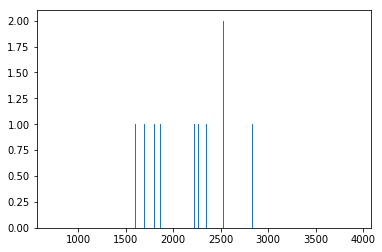

In [25]:
%matplotlib inline

data=df['Energy (kcal)']
plt.hist(data, bins=np.arange(data.min(), data.max()+1)-0.5)

In [26]:
corr = df[['HEI2015_TOTAL_SCORE','Energy (kcal)','hei_totveg','hei_greensbeans', 'hei_totfruit', 'hei_wholefruit', 'hei_totproteins', 
           'hei_seafoodplantprot','hei_wholegrains', 'hei_dairy','ripctsfa', 'hei_sodium','hei_refinedgrains',
           'hei_addedsugars']].corr()
corr_styled=corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr_styled